In [105]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px


In [104]:
churn_data=pd.read_csv('data/churn.zip')
churn_data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### 9.1. 
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

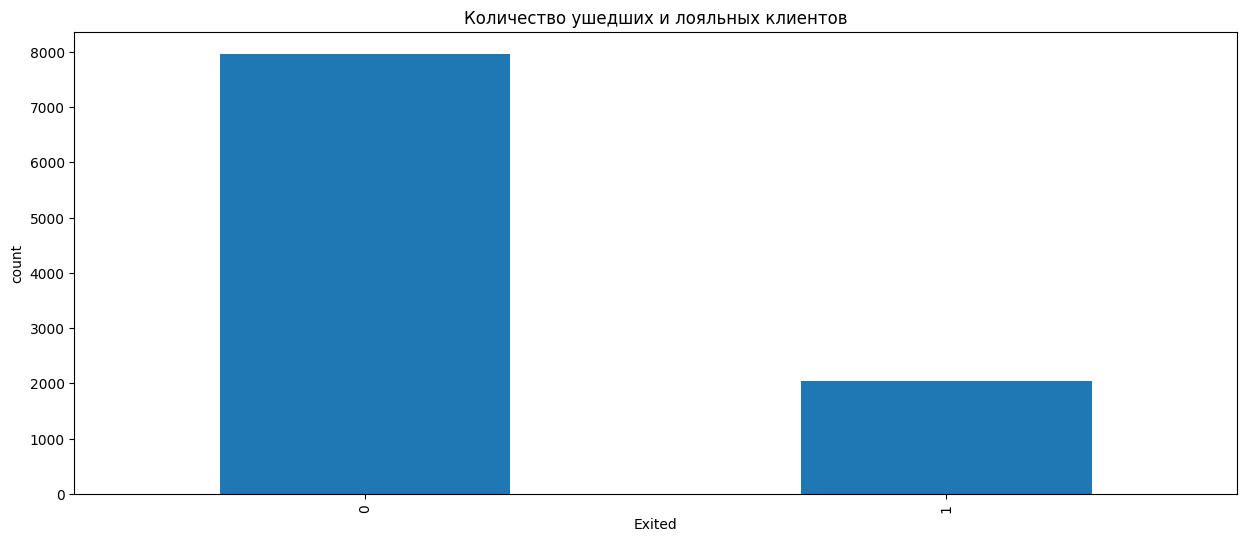

In [17]:
df=churn_data.groupby(by='Exited')['Exited'].count()
df.plot(
    kind='bar',
    figsize=(15, 6),
    title='Количество ушедших и лояльных клиентов',
    ylabel='count'
);


In [18]:
print(f'Cоотношение ушедших и лояльных клиентов {round(df[1]/df[0], 2)}')


Cоотношение ушедших и лояльных клиентов 0.26


Из графика видно, что количество ушедших клиентов составляет примерно четверть от лояльных 

#### 9.2. 
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

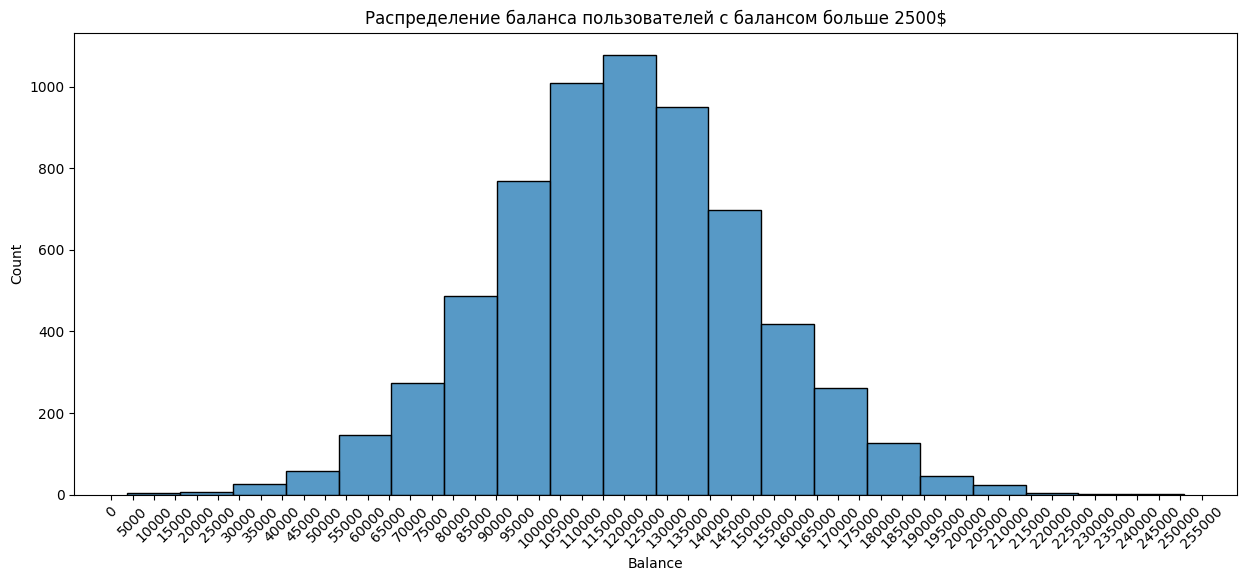

In [19]:
df=churn_data[churn_data['Balance']>2500]
fig=plt.figure(figsize=(15,6))
hist=sns.histplot(
    data=df,
    x='Balance',
    bins=20
)
hist.xaxis.set_tick_params(rotation=45)
#hist.grid()
hist.set_title('Распределение баланса пользователей с балансом больше 2500$')
hist.set_xticks(range(0,260000,5000));


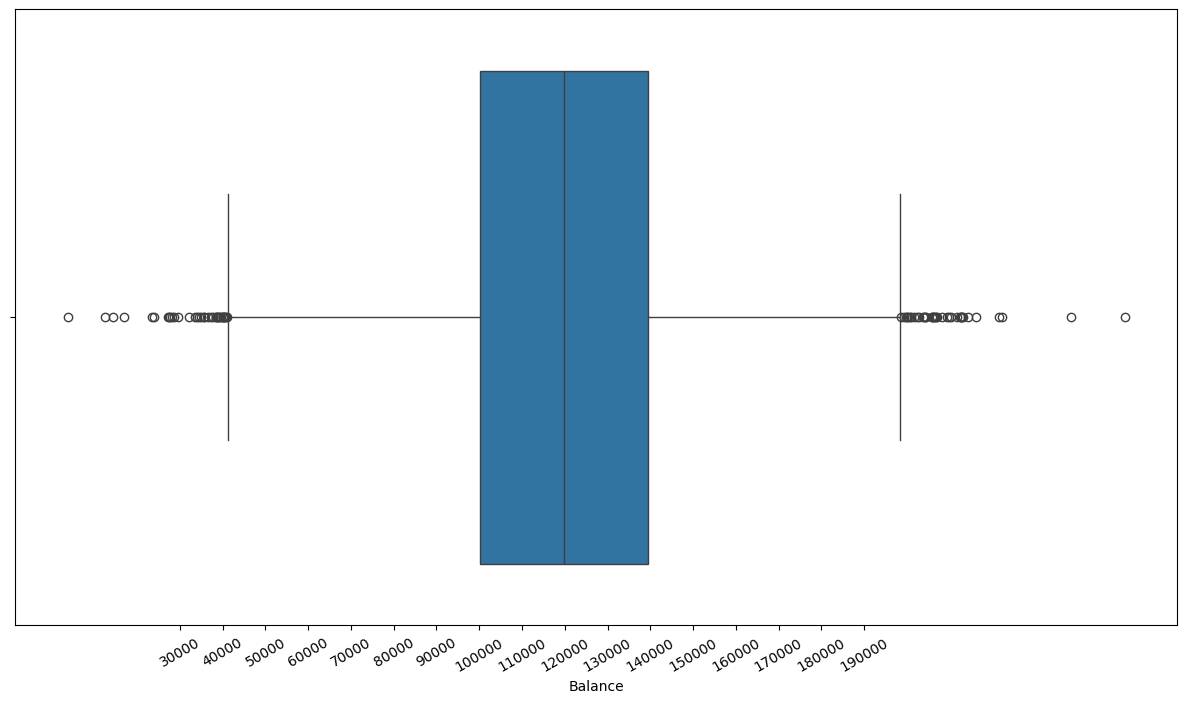

In [20]:
fig = plt.figure(figsize=(15, 8))
ax = sns.boxplot(
    data=df,
    x='Balance'
)
ax.set_xticks(range(30000, 200000, 10000))
ax.xaxis.set_tick_params(rotation=30)


Баланс расматриваемых пользователей находится в диапозоне от 3700 до 250000$, самая распространенная сумма порядка 120000$. Распределение напоминает нормальное.

#### 9.3. 
Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

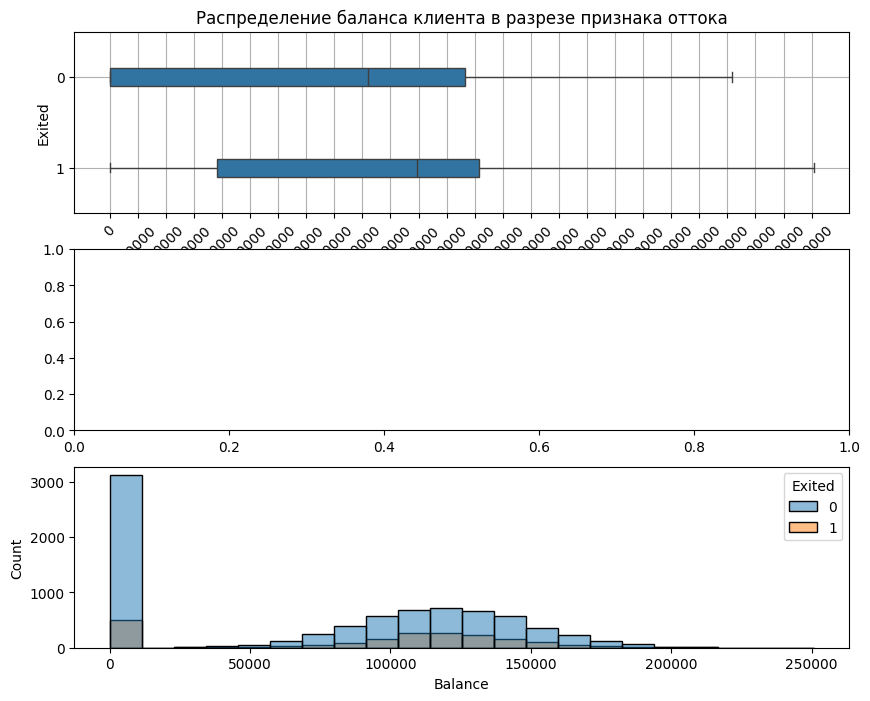

In [21]:
#fig=plt.figure(figsize=(15,6))
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))
box=sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    width=0.2,
    orient='h',
    ax=axes[0]
)
hs=sns.histplot(
    data=churn_data,
    x='Balance',
    hue='Exited',
    ax=axes[2]
)
box.xaxis.set_tick_params(rotation=45)
box.grid()
box.set_title('Распределение баланса клиента в разрезе признака оттока')
box.set_xticks(range(0,260000,10000));


Разброс сумм у ушедших клиентов меньше лояльных, медиана у ушедших также больше -порядка 110 тысяч, против 90 тысяч у лояльных клиентов. Возможно отток связан с тем, что условия для клиентов с таким балансом не выгодны для клиентов.

#### 9.4. 
Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

''

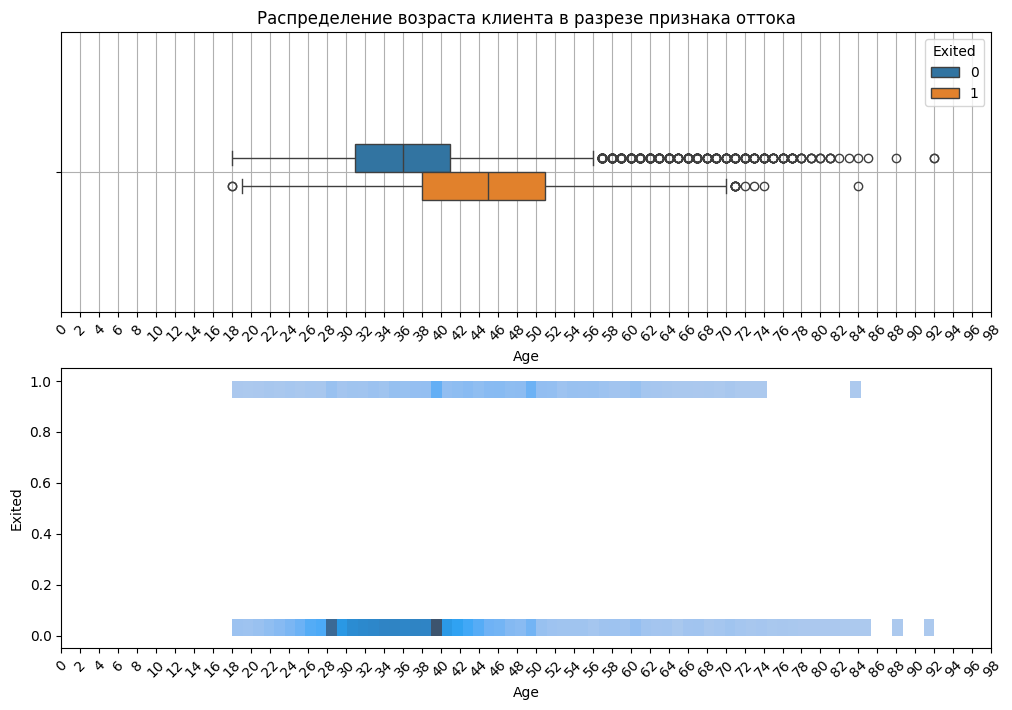

In [22]:
fig, axes = plt.subplots(2,1, figsize= (12,8))
#fig=plt.figure(figsize=(17,6))
box=sns.boxplot(
    data=churn_data,
    hue='Exited',
    x='Age',
    width=0.2,
    orient='h',
    ax=axes[0]
)
box.xaxis.set_tick_params(rotation=45)
box.grid()
box.set_xticks(range(0,100,2))


box.set_title('Распределение возраста клиента в разрезе признака оттока')
#box.set_xticks(range(0, 96, 2))
hist = sns.histplot(
    data=churn_data,
    x='Age',
    y='Exited',
    ax=axes[1]
)
hist.set_xticks(range(0,100, 2))
hist.xaxis.set_tick_params(rotation=45)

;


In [23]:
px.histogram(
    data_frame=churn_data,
    x='Age',
    color='Exited'
)


/home/elena/.local/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Из графика видно, что в груаае лояльных клиентов больше потенциальных вбросов.Для снижения отттоков клиентов банку слудует обратить внимание на возрастную категорию от 38 до 51 лет.

#### 9.5. 
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [24]:
fig=px.scatter(
    data_frame=churn_data,
    x='EstimatedSalary',
    y='CreditScore',
    log_x=True,
    log_y=True,
    color='Exited',
    title='Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты'
)
#import plotly.io as pio
#pio.show(fig)
#fig.show("img")

#$ pip install -U kaleido
#fig.write_image('img.png')
#fig.show()
fig.show()#'png')
#fig.show()


![title]['img.png']

#### 9.6. 
Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Какой-либо зависимости между признаками не прослеживается. Ни в обычном, не в логорифмическом масштабе.

In [26]:
df=churn_data.groupby(by='Gender', as_index=False)['Exited'].mean()
df['Exited']=df['Exited']*100
pie=px.pie(
    data_frame=df,
    values="Exited",
    names='Gender',
    title='Отток клиентов по гендерному признаку',
    height=400,
    width=500
)
pie.show()


In [27]:
df


,Gender,Exited
0,Female,25.071539
1,Male,16.455928


In [28]:
bar=px.bar(
    data_frame=df,
    y="Exited",
    x='Gender',
    title='Отток клиентов по гендерному признаку',
    height=400,
    width=500,
    color='Gender'
)
bar.show();


/home/elena/.local/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Чаще уходят женщины - 60% против 40% мужчин

#### 9.7. 
Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [29]:
df.rename(columns={'RowNumber':'count'}, inplace=True)


In [30]:
df


,Gender,Exited
0,Female,25.071539
1,Male,16.455928


In [31]:
df=churn_data
df['count']=df['Exited']
df=df.groupby(by=['NumOfProducts', 'Exited'], as_index=False)['RowNumber'].count().rename(columns={'RowNumber':'count'})
bar=px.bar(
    data_frame=df,
    x='NumOfProducts',
    y='count',
    color='Exited',
    width=600,
    height=450,
    title='Отток количества клиентов от числа приобретённых у банка услуг',
    text='Exited'
)
bar.show()


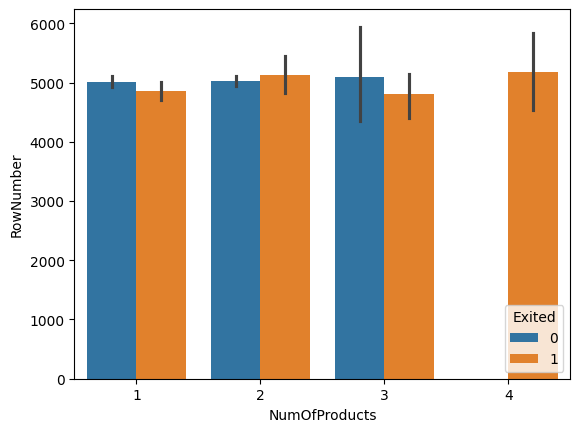

In [32]:
bar=sns.barplot(
    data=churn_data,
    x='NumOfProducts',
    y='RowNumber',
    #estimator='count',
    hue='Exited'
)


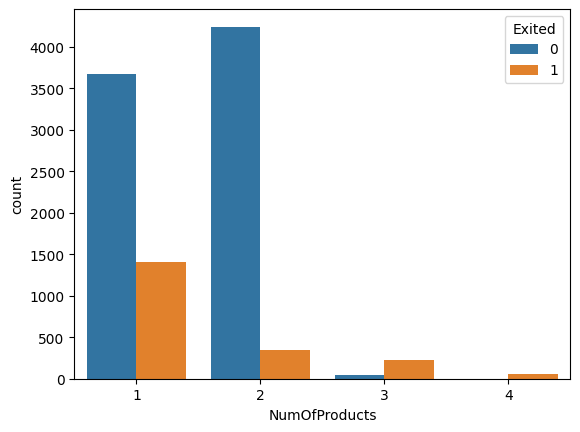

In [33]:
bar=sns.barplot(
    data=df,
    x='NumOfProducts',
    y='count',
    hue='Exited'
)


Самый минимальный оттток при использовании 2 продуктовБ далее с увеличением количества продуктов идет увеличение и оттока

#### 9.8. 
Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [34]:
df=churn_data.groupby(by=['IsActiveMember', 'Exited'], as_index=False)['RowNumber'].count()
display(df)
bar=px.bar(
    data_frame=df,
    x='IsActiveMember',
    y='RowNumber',
    color='Exited',
    text='Exited',
    width=550,
    height=450,
    title='Влияние наличие статуса активного клиента на отток клиентов',
    labels={'RowNumber':'count'}
)
bar.show()#'png')


,IsActiveMember,Exited,RowNumber
0,0,0,3547
1,0,1,1302
2,1,0,4416
3,1,1,735


In [37]:
df=churn_data.groupby(by=['IsActiveMember', 'Exited'], as_index=False)['RowNumber'].count()
df['IsActiveMember']=df['IsActiveMember'].apply(lambda x:"Active member" if x==1 else "No active")
df['Exited']=df['Exited'].apply(lambda x: 'exited' if x==1 else 'No exited')
fig=px.sunburst(
    data_frame=df,
    path=['IsActiveMember', 'Exited'],
    values='RowNumber',
    width=550,
    height=450,
    color_continuous_scale=True
)
fig.show()#'png')


В группе клиентов с активным статусом отток ниже. В качестве рекоммнедации барку для снижения оттока я бы рекомендовала увеличивать группу активных клиентов.

#### 9.9. 
В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [42]:
df=churn_data.groupby(by='Geography', as_index=False)['Exited'].mean()
display(df)


,Geography,Exited
0,France,0.161548
1,Germany,0.324432
2,Spain,0.166734


In [43]:

# df=churn_data.groupby(by='Geography', as_index=False).mean()
# display(df)
fig=px.choropleth(
    data_frame=df,
    locations='Geography',
    locationmode='country names',
    color='Exited',
    width=700,
    height=500,
    title='Отток клиентов на карте мира'
)
fig.show()#'png')


В Германии отток клиентов выше. Возможно это связано с балансом на счетах клиентовю Как мы показывали в задании 9.3 у ушедших клиентов медиана баланса значительно превышала медиану баланса лояльных.

#### 9.10. 
Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.


На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [33]:
### из задания
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"


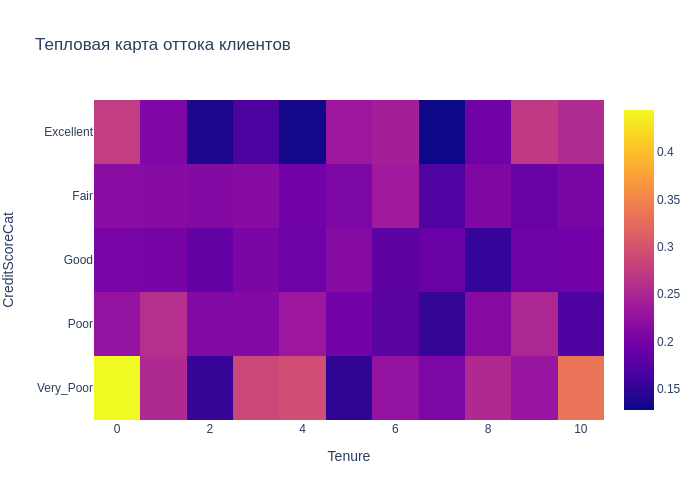

In [34]:
churn_data['CreditScoreCat']=churn_data['CreditScore'].apply(get_credit_score_cat)
pt=churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure'
)
fig=px.imshow(
    pt,
    width=700,
    height=500,
    title='Тепловая карта оттока клиентов'
)
fig.show('png')


Самый высокий отток у клиентов с самым низким кредитным рейтингом (Very_Poor) и самым низким количеством лет, в течении которых клиент пользуется услугами банка (Tenure=0) и у клиентов с кредитным рейтингом Very_Poor и Tenure=1-

In [116]:
import pandas as pd

In [118]:
groups = [f'P{i}' for i in range(7)]


TypeError: 'list' object is not callable

In [108]:
[f'P{i}' for i in range(7)]


TypeError: 'list' object is not callable

In [46]:
import numpy as np


In [47]:
x = np.arange(0, 5, 0.1)
def f(x):
    return x**2

px.scatter(x=x, y=f(x)).show()



In [48]:
x


array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [44]:
import plotly.graph_objs as go


In [49]:
go.Scatter(x=x, y=f(x))


Scatter({
    'x': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
                1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
                2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
                4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
    'y': array([0.000e+00, 1.000e-02, 4.000e-02, 9.000e-02, 1.600e-01, 2.500e-01,
                3.600e-01, 4.900e-01, 6.400e-01, 8.100e-01, 1.000e+00, 1.210e+00,
                1.440e+00, 1.690e+00, 1.960e+00, 2.250e+00, 2.560e+00, 2.890e+00,
                3.240e+00, 3.610e+00, 4.000e+00, 4.410e+00, 4.840e+00, 5.290e+00,
                5.760e+00, 6.250e+00, 6.760e+00, 7.290e+00, 7.840e+00, 8.410e+00,
                9.000e+00, 9.610e+00, 1.024e+01, 1.089e+01, 1.156e+01, 1.225e+01,
                1.296e+01, 1.369e+01, 1.444e+01, 1.521e+01, 1.600e+01, 1.681e+01,
                1.764e+01, 1.849e+01, 1.936e+01, 2.025e+01, 2.116e+01, 2.209e+01,
                2.

In [50]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x)))
fig.show()


In [51]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x)))
fig.add_trace(go.Scatter(x=x, y=x))
fig.show()


In [52]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), name='$$f(x)=x^2$$'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.show()


In [54]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, name='g(x)=x'))
fig.show()


In [55]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x),  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.update_layout(legend_orientation="h")
fig.show()


In [56]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x),  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.update_layout(legend_orientation="h", 
                  margin=dict(l=0, r=0, t=0, b=0))
fig.show()


In [63]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x),  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor='center'),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.show()


In [64]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x),  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  title="Plot Title",
                  xaxis_title="x Axis Title",
                  yaxis_title="y Axis Title",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()


In [65]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers', name='$$g(x)=x$$'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.show()


In [67]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers', name='$$g(x)=x$$'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="y")
fig.show()


In [71]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers', name='g(x)=x'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x} <br>Функция: %{y}")
fig.show()


In [74]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers', name='g(x)=x'))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="y",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}", marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')))
fig.show()


In [77]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=15, line=dict(color='MediumPurple', width=3))))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()


In [79]:
range=[-0.5, 1.5]


In [78]:
fig = go.Figure()
fig.update_yaxes(range=[-0.5, 1.5])
fig.update_xaxes(range=[-0.5, 1.5])
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()


In [80]:
fig = go.Figure()
fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink')
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000')
fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()


In [81]:
def h(x):
    return np.sin(x)

def k(x):
    return np.cos(x)

def m(x):
    return np.tan(x)


fig = go.Figure()
fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink')
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000')

fig.add_trace(go.Scatter(visible='legendonly', x=x, y=h(x),  name='h(x)=sin(x)'))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=k(x),  name='k(x)=cos(x)'))
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=m(x),  name='m(x)=tg(x)'))

fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'))
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))))
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()


In [83]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots


In [84]:
fig = make_subplots(rows=1, cols=2)

fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink')
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000')

fig.add_trace(go.Scatter(x=x, y=h(x),  name='h(x)=sin(x)'), 1, 1)
fig.add_trace(go.Scatter(x=x, y=k(x),  name='k(x)=cos(x)'), 1, 1)
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=m(x),  name='m(x)=tg(x)'), 1, 1)

fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'), 1, 2)
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))), 1, 2)
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()


In [85]:
fig = make_subplots(rows=1, cols=2)

fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink', col=2)
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000', col=2)

fig.add_trace(go.Scatter(x=x, y=h(x),  name='h(x)=sin(x)'), 1, 1)
fig.add_trace(go.Scatter(x=x, y=k(x),  name='k(x)=cos(x)'), 1, 1)
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=m(x),  name='m(x)=tg(x)'), 1, 1)

fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'), 1, 2)
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))), 1, 2)
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()


In [86]:
fig = make_subplots(rows=1, cols=2)

fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink', col=2)
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000', col=2)

fig.add_trace(go.Scatter(x=x, y=h(x),  name='h(x)=sin(x)'), 1, 1)
fig.add_trace(go.Scatter(x=x, y=k(x),  name='k(x)=cos(x)'), 1, 1)
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=m(x),  name='m(x)=tg(x)'), 1, 1)

fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'), 1, 2)
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))), 1, 2)
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.update_layout(title="Plot Title",
                  xaxis_title="x Axis Title",
                  yaxis_title="y Axis Title")
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()


In [87]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Plot 1", "Plot 2"))

fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink', col=2)
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000', col=2)

fig.add_trace(go.Scatter(x=x, y=h(x),  name='h(x)=sin(x)'), 1, 1)
fig.add_trace(go.Scatter(x=x, y=k(x),  name='k(x)=cos(x)'), 1, 1)
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=m(x),  name='m(x)=tg(x)'), 1, 1)

fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'), 1, 2)
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))), 1, 2)
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=40, b=0))
fig.update_layout(title="Plot Title")
fig.update_xaxes(title='Ось X графика 1', col=1, row=1)
fig.update_xaxes(title='Ось X графика 2', col=2, row=1)
fig.update_yaxes(title='Ось Y графика 1', col=1, row=1)
fig.update_yaxes(title='Ось Y графика 2', col=2, row=1)
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()


In [88]:
fig = make_subplots(rows=1, cols=2, column_widths=[2, 1])

fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink', col=2)
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000', col=2)

fig.add_trace(go.Scatter(x=x, y=h(x),  name='h(x)=sin(x)'), 1, 1)
fig.add_trace(go.Scatter(x=x, y=k(x),  name='k(x)=cos(x)'), 1, 1)
fig.add_trace(go.Scatter(visible='legendonly', x=x, y=m(x),  name='m(x)=tg(x)'), 1, 1)

fig.add_trace(go.Scatter(x=x, y=f(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'), 1, 2)
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=20, line=dict(color='MediumPurple', width=3))), 1, 2)
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
fig.show()
